# Advent of Code 2023

## Day 10

In [54]:
import aoc
aoc.read_input("cookie.txt", "input_2023", 2023, 10)

### Puzzle 1 

Reflection: This looks to me like a 2D array that should be modeled as a graph. I struggled with getting the orientation correct. My initial graph was rotated 90 degrees.

I also struggled with figuring out how to deal with non-main-loop pipes that terminated in the same location as main loop pipe. For example "-F". The left-side character suggests that the pipe goes into the right-side character, but there's no corresponding way for that pipe to enter the right-side character. I solved this by first using a directed graph, and then converting to an undirected graph keeping only those edges appear in both directions.

In [101]:
import networkx as nx
import numpy as np
G = nx.DiGraph()

with open("input_2023/10.txt") as f:
    lines = []
    for line in f:
        chars = [char for char in line.strip()]
        lines.append(chars)

pipe_dict = {
    "|": [(0, 1), (0, -1)],
    "-": [(1, 0), (-1, 0)],
    "L": [(0, -1), (1, 0)],
    "J": [(0, -1), (-1, 0)],
    "7": [(-1, 0), (0, 1)],
    "F": [(1, 0), (0, 1)],
    "S": [(1, 0), (0, 1), (-1, 0), (0, -1)]
}

label_dict = {}
pos_dict = {}

arr = np.array(lines)

# pad the array to prevent attempts to connect to nodes outside array
arr = np.pad(arr, 1, "constant", constant_values=".")

for y, row in enumerate(arr):
    for x, char in enumerate(row):
        node = (x, -1*y)
        label_dict[node] = char
        pos_dict[node] = (x, -1*y)
        if char in pipe_dict:
            for neighbor_coord_diff in pipe_dict[char]:
                neighbor = (neighbor_coord_diff[0] + x, -1 * (neighbor_coord_diff[1] + y))
                G.add_edge(node, neighbor)
        if char == "S":
            start = node
# 
G = G.to_undirected(reciprocal=True)
farthest = len(nx.find_cycle(G, start)) / 2
farthest


6733.0

### Puzzle 2

Reflection: I have no idea how to solve this with pure Python. But if each node in the circuit is a vertex of a Shapely Polygon object, then the total number of enclosed tiles is the area of that object minus the area of the boundary. Since the boundary passes through the middle of each cell, you should subtract the inside 1/2 of each cell (i.e. a mitre buffer of -0.5)

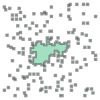

435.0


In [156]:
import networkx as nx
import numpy as np
from shapely.geometry import Polygon

G = nx.DiGraph()

with open("input_2023/10.txt") as f:
    lines = []
    for line in f:
        chars = [char for char in line.strip()]
        lines.append(chars)

pipe_dict = {
    "|": [(0, 1), (0, -1)],
    "-": [(1, 0), (-1, 0)],
    "L": [(0, -1), (1, 0)],
    "J": [(0, -1), (-1, 0)],
    "7": [(-1, 0), (0, 1)],
    "F": [(1, 0), (0, 1)],
    "S": [(1, 0), (0, 1), (-1, 0), (0, -1)]
}

label_dict = {}
pos_dict = {}

arr = np.array(lines)

# pad the array to prevent attempts to connect to nodes outside array
arr = np.pad(arr, 1, "constant", constant_values=".")

tiles = []

for y, row in enumerate(arr):
    for x, char in enumerate(row):
        node = (x, -1*y)
        G.add_node(node)
        label_dict[node] = char
        pos_dict[node] = (x, -1*y)
        if char in pipe_dict:
            for neighbor_coord_diff in pipe_dict[char]:
                neighbor = (neighbor_coord_diff[0] + x, -1 * (neighbor_coord_diff[1] + y))
                G.add_edge(node, neighbor)
        if char == "S":
            start = node 
G = G.to_undirected(reciprocal=True)
vertices = [edge[0] for edge in nx.find_cycle(G, start)]

# Create a polygon and negative buffer it to find enclosed 
enclosed = Polygon(vertices).buffer(-.5, join_style=2)
display(enclosed)
print(enclosed.area)

## Day 9

In [27]:
import aoc
aoc.read_input("cookie.txt", "input_2023", 2023, 9)

### Puzzle 1

Reflection: I wondered at first if these were general interest sequences that might be found in the [On-Line Encyclopedia of Integer Sequences](https://oeis.org/), but sadly that doesn't seem to be the case. The trick here was a relatively simple recursive function that calculated the next sequence on the way down, then calculated the final value in the sequence on the way back up the recursion stack.

In [30]:
def seq_reducer(seq):
    new_seq = [seq[i+1] - seq[i] for i in range(len(seq) - 1)]
    if any(new_seq): # any of the values in new_seq are not zero
        next_seq = seq_reducer(new_seq)
        new_final = next_seq[-1] + new_seq[-1]
        new_seq.append(new_final)       
    else:
        new_seq.append(0)
    return new_seq # since it returns new_seq, the function cannot determine the value of the first line


vals = []
with open("input_2023/9.txt") as f:
    for line in f:
        seq = [int(num) for num in line.split()]
        vals.append(seq_reducer(seq)[-1] + seq[-1]) # determine the value of the first line

sum(vals)

2098530125

### Puzzle 2

Reflection: I was a little worried that my initial solution was going to cause me some trouble on puzzle 2 (like it did on day 8), but all I had to do was change the seq_reducer function to calculate the first value in the sequence, rather than the last value.

In [50]:
def seq_reducer2(seq):
    new_seq = [seq[i+1] - seq[i] for i in range(len(seq) - 1)]
    if any(new_seq): # any of the values in new_seq are not zero
        next_seq = seq_reducer2(new_seq)
        new_first = new_seq[0] - next_seq[0]
        new_seq.insert(0, new_first)       
    else:
        new_seq.insert(0, 0)
    return new_seq

vals = []
with open("input_2023/9.txt") as f:
    for line in f:
        seq = [int(num) for num in line.split()]
        vals.append(seq[0] - seq_reducer2(seq)[0])
sum(vals)

1016

Reflection: just for fun, wanted to create a single function that would add both the first and last values

In [52]:
def seq_reducer3(seq):
    new_seq = [seq[i+1] - seq[i] for i in range(len(seq) - 1)]
    if any(new_seq): # any of the values in new_seq are not zero
        next_seq = seq_reducer3(new_seq)
        new_first = new_seq[0] - next_seq[0]
        new_seq.insert(0, new_first)  
        new_final = next_seq[-1] + new_seq[-1]
        new_seq.append(new_final)   
    else:
        new_seq.insert(0, 0)
        new_seq.append(0)
    return new_seq

endvals = []
startvals = []
with open("input_2023/9.txt") as f:
    for line in f:
        seq = [int(num) for num in line.split()]
        startvals.append(seq[0] - seq_reducer3(seq)[0])
        endvals.append(seq_reducer3(seq)[-1] + seq[-1])
print(sum(endvals), sum(startvals))

2098530125 1016


## Day 8

In [65]:
import aoc
aoc.read_input("cookie.txt", "input_2023", 2023, 8)

### Puzzle 1

Reflection: This seems like it should be a graph traversal problem. I don't think that's strictly necessary for solving Puzzle 1, but I'm betting it will be necessary for puzzle 2

In [4]:
import networkx as nx

# Parse input into graph
G = nx.DiGraph()

with open("input_2023/8.txt") as f:
    directions = next(f).strip()
    next(f)
    for line in f:
        nodename, dest_string = line.strip().split(" = ")
        left, right = dest_string[1:-1].split(", ")
        if not (nodename == left and nodename == right):
            G.add_edge(nodename, left, direction="L")
            G.add_edge(nodename, right, direction="R")

# Travel along path according to directions
current_node = "AAA"
counter = 0
while current_node != "ZZZ":
    for direction in directions:
        successors = [node for node in G.successors(current_node)]
        successor1 = successors[0]
        successor2 = successors[-1]
        if G.edges[current_node, successor1]["direction"] == direction:
            current_node = successor1
        else: 
            current_node = successor2
        counter += 1
counter


21409

### Puzzle 2

Reflection: I was really hoping the second puzzle would just be "find the shortest path from AAA to ZZZ", which would have been trivial once the graph was created. My initial naive approach ran for several million loops without finding a point where all paths reached an end node.

I realized that each path is going to cycle through end nodes at some periodicity. All paths will be on an end node when all the periods match up, i.e. at the least common multiple of the periods. I looked up an LCM algorithm and tweaked it.

In [195]:
G = nx.DiGraph()

with open("input_2023/8.txt") as f:
    directions = next(f).strip()
    next(f)
    for line in f:
        nodename, dest_string = line.strip().split(" = ")
        left, right = dest_string[1:-1].split(", ")
        if not (nodename == left and nodename == right):
            G.add_edge(nodename, left, direction="L")
            G.add_edge(nodename, right, direction="R")

In [209]:
current_nodes = [node for node in G.nodes if node.endswith("A")]
for current_node in current_nodes:
    counter = 0
    steps_to_end_node = []

    while len(steps_to_end_node) < 5:
        for direction in directions:
            successors = [node for node in G.successors(current_node)]
            successor1 = successors[0]
            successor2 = successors[-1]
            if G.edges[current_node, successor1]["direction"] == direction:
                current_node = successor1
            else: 
                current_node = successor2
            counter += 1
            if current_node.endswith("Z"):
                steps_to_end_node.append(counter)
    print(steps_to_end_node)

[21409, 42818, 64227, 85636, 107045]
[14363, 28726, 43089, 57452, 71815]
[15989, 31978, 47967, 63956, 79945]
[16531, 33062, 49593, 66124, 82655]
[19241, 38482, 57723, 76964, 96205]
[19783, 39566, 59349, 79132, 98915]


In [214]:
from functools import reduce

def find_lcm(num1, num2):
    if(num1>num2):
        num = num1
        den = num2
    else:
        num = num2
        den = num1
    rem = num % den
    while(rem != 0):
        num = den
        den = rem
        rem = num % den
    gcd = den
    lcm = (num1 * num2)//gcd
    return lcm

lst = [21409, 14363, 15989, 16531, 19241, 19783]
lcm = reduce(find_lcm, lst)
     
print(lcm)

21165830176709


## Day 7

In [28]:
import aoc
aoc.read_input("cookie.txt", "input_2023", 2023, 7)

Reflection: I wanted to use a function with two parameters as the sort key function, but I didn't know how to do that. I learned that you can wrap the function in a lambda, then pass the lambda function to the key parameter.

In [29]:
def cardscore(line, card):
    hand = line[0]
    cardval = {
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5": 5,
        "6": 6,
        "7": 7,
        "8": 8,
        "9": 9,
        "T": 10,
        "J": 11,
        "Q": 12,
        "K": 13,
        "A": 14
    }
    return cardval[hand[card]]

def handscore(line):
    hand = line[0]
    handval = {
        "Five of a kind": 6,
        "Four of a kind": 5,
        "Full house": 4,
        "Three of a kind": 3,
        "Two pair": 2,
        "One pair": 1,
        "High card": 0
        
    }
    firsttest = len(set(hand))
    secondtest = max(hand.count(cardval) for cardval in hand)
    

    if firsttest == 1:
        hand_type = "Five of a kind"
    elif firsttest == 4:
        hand_type = "One pair"
    elif firsttest == 5:
        hand_type = "High card"
    elif secondtest == 4:
        hand_type = "Four of a kind"
    elif secondtest == 2:
        hand_type = "Two pair"
    elif firsttest == 2 and secondtest == 3:
        hand_type = "Full house"
    else:
        hand_type = "Three of a kind"

    return handval[hand_type]
    
    

with open("input_2023/7.txt") as f:
    lines = [line.strip().split() for line in f]
    
    # to sort by cards in order, you have to sort by the last card, then the second to last card, etc
    for i in reversed(range(5)):
        lines = sorted(lines, key=lambda line: cardscore(line, i))
    # then sort by hand type
    lines = sorted(lines, key=handscore)
    winnings = [int(line[1]) * (i+1) for i, line in enumerate(lines)]

sum(winnings)



250951660

### Puzzle 2

Reflection: The "clever" tests used in puzzle 1 to determine the hand type no longer worked in puzzle 2. I had to rewrite the tests to more explicitly match each possible hand. The solution to the first puzzle turned out to be a premature optimization that I shouldn't have done.

In [64]:
def cardscore(line, card):
    hand = line[0]
    cardval = {
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5": 5,
        "6": 6,
        "7": 7,
        "8": 8,
        "9": 9,
        "T": 10,
        "J": 0,
        "Q": 12,
        "K": 13,
        "A": 14
    }
    return cardval[hand[card]]

def handscore2(line):
    hand = line[0]
    
    handval = {
        "Five of a kind": 6,
        "Four of a kind": 5,
        "Full house": 4,
        "Three of a kind": 3,
        "Two pair": 2,
        "One pair": 1,
        "High card": 0
        
    }

    # remove all jokers
    jokers = len(hand) - len(hand.replace("J", ""))
    hand = hand.replace("J", "")

    # count numbers of card duplicates
    test = sorted([hand.count(cardval) for cardval in set(hand)], reverse=True)

    # Python 3.9, so no structural pattern matching
    if jokers == 5 or test[0] == 5:
        hand_type = "Five of a kind"
    elif test[0] == 4:
        hand_type = "Four of a kind"
    elif len(hand) == 5 and test[0] == 3 and test[1] == 2 :
        hand_type = "Full house"
    elif test[0] == 3:
        hand_type = "Three of a kind"
    elif len(hand) >= 4 and test[0] == 2 and test[1] == 2:
        hand_type = "Two pair"
    elif test[0] == 2:
        hand_type = "One pair"
    else:
        hand_type = "High card"

    # Change the hand type based on original + number of jokers
    joker_transform = {
        1: {
            "Four of a kind": "Five of a kind",
            "Three of a kind": "Four of a kind",
            "Two pair": "Full house",
            "One pair": "Three of a kind",
            "High card": "One pair" 
        },
        2: {
            "Three of a kind": "Five of a kind",
            "One pair": "Four of a kind",
            "High card": "Three of a kind"    
        },
        3: {
            "One pair": "Five of a kind",
            "High card": "Four of a kind"
        },

        4: {
            "High card": "Five of a kind"
        }
    }

    if jokers <= 4 and jokers > 0:
        hand_type = joker_transform[jokers][hand_type]
    
    return handval[hand_type]

with open("input_2023/7.txt") as f:
    lines = [line.strip().split() for line in f]
    
    # to sort by cards in order, you have to sort by the last card, then the second to last card, etc
    for i in reversed(range(5)):
        lines = sorted(lines, key=lambda line: cardscore(line, i))
    # then sort by hand type
    lines = sorted(lines, key=handscore2)
    winnings = [int(line[1]) * (i+1) for i, line in enumerate(lines)]

sum(winnings)

IndexError: list index out of range

## Day 6

In [303]:
import aoc
aoc.read_input("cookie.txt", "input_2023", 2023, 6)

### Puzzle 1

Reflection: The trick to this one is to not loop through every possible combination, but to realize it is a math problem. The distance (d) the boat travels is velocity (v) times move time (m). The move time is equal to the race time (t) - button time (b). The velocity is equal to the button time. That means

d = vm

m = t - b

v = b

d = b(t - b)

d = -b<sup>2</sup> + tb

we need to know when distance is greater than the record distance (r), which is when

-b<sup>2</sup> + tb - r > 0

you can use the quadradic formula to figure out the values of b that satisfy this inequality

In [358]:
# parse the input
from collections import namedtuple
import math
from functools import reduce
Race = namedtuple("Race", "time distance")
with open("input_2023/6.txt") as f:
    racetimes = next(f).split(":")[1].split()
    racedistances = next(f).split(":")[1].split()
    races = [Race(int(time), int(dist)) for time, dist in zip(racetimes, racedistances)]

def num_win_options(a, b, c):
    # quadradic formula
    discriminant = math.sqrt(b**2 - 4*a*c)
    firstroot = (-1*b + discriminant)/(2*a)
    secondroot = (-1*b - discriminant)/(2*a)
    
    # find first integer larger than firstroot (min button time to win)
    min_button_time = firstroot+1 if firstroot.is_integer() else math.ceil(firstroot)
    
    # find last integer smaller than secondroot (max button time to win)
    max_button_time = secondroot-1 if secondroot.is_integer() else math.floor(secondroot)

    win_options = max_button_time - min_button_time + 1
    return win_options


num_ways_to_win = []

for race in races:
    ways_to_win = num_win_options(-1, race.time, -1*race.distance)
    num_ways_to_win.append(ways_to_win)

reduce((lambda x, y: x*y), num_ways_to_win)

2344708

### Puzzle 2

Reflection: You can solve the second puzzle the same way

In [360]:
# Parse the input
with open("input_2023/6.txt") as f:
    racetime = int(next(f).split(":")[1].replace(" ", ""))
    racedistance = int(next(f).split(":")[1].replace(" ", ""))

ways_to_win = num_win_options(-1, racetime, -1*racedistance)
print(ways_to_win)

30125202


## Day 5

In [1]:
import aoc
aoc.read_input("cookie.txt", "input_2023", 2023, 5)

### Puzzle 1

Reflection: Parsing the file was tricky, but my solution still didn't work even after I was sure I was parsing the file correctly. It turned out that the problem was after setting a new value from the mapping, it was using the same mapping (e.g. after changing soil to fertilizer, the code continued to use the soil-to-fertilizer map instead of moving to the fertilizer-to-water map). The skip_remaining value tells the loop to continue until it encounters a new mapping

In [208]:
# Parse puzzle input

def find_location(source, f):
    source_type = "seed"
    skip_remaining = False
    next(f) # skip first line w/ seed numbers
    for line in f:
        if line.strip().endswith(":"): # new map

            active_map = line.strip()[:-4]
            #print(f"{source_type}: {source}")
            source_type = active_map.split("-")[-1]
            skip_remaining = False
            continue
        
        if skip_remaining: # don't parse input until you get to a line defining a new mapping
            continue
        elif len(line.strip()) == 0: # empty lines
            continue
        else:
            dest_start, source_start, length  = [int(val) for val in line.split()]
            
            if source >= source_start and source <= source_start + length:
                source = dest_start + source - source_start
                skip_remaining = True
    return(source)
        
# Get seed numbers
with open("input_2023/5.txt") as f:
    seeds = [int(seed) for seed in next(f).split(":")[1].split()]

locs = []
for seed in seeds:
    with open("input_2023/5.txt") as f:
        loc = find_location(seed, f)
        locs.append(loc)
min(locs)

289863851

### Puzzle 2

Puzzle 1 deals with 20 seeds. Puzzle 2 deals with over 1 billion seeds. Looping over the entire file for every seed is not going to work. I tried a few different strategies, like converting the maps into graphs, but I was not able to solve this problem.

## Day 4    

In [393]:
import aoc
aoc.read_input("cookie.txt", "input_2023", 2023, 4)

### Puzzle 1

In [408]:
total = []
with open("input_2023/4.txt") as f:
    for rowtext in [line.split(":")[1].split("|") for line in aoc.parse_lines(f)]:
        winners, numbers = rowtext
        winners = winners.split()
        numbers = numbers.split()
        matches = 0
        for number in numbers:
            if number in winners:
                matches += 1
        score = 2 ** (matches - 1) if matches > 0 else 0
        total.append(score)
sum(total)


21138

### Puzzle 2

Reflection: I was worried that the brute force approach used here of several nested loops would result in an unacceptably long run time. That turned out not the be the case, however.

In [436]:
# Create a dictionary of cards in the form {cardnum1: nummatches, cardnum2: nummatches}
carddict = {}
with open("input_2023/4.txt") as f:
    for i, rowtext in enumerate([line.split(":")[1].split("|") for line in aoc.parse_lines(f)]):
        winners, numbers = rowtext
        winners = winners.split()
        numbers = numbers.split()
        matches = 0
        for number in numbers:
            if number in winners:
                matches += 1
        carddict[i+1] = matches

# Create a dictionary holding the number of copies of each card
cardcopies = {k:1 for k in carddict.keys()}

# Update the cardcopies dictionary
for cardnum, matches in carddict.items():
    for i in range(cardcopies[cardnum]):
        for i in range(cardnum+1, cardnum+matches+1):
            cardcopies[i] += 1

# total number of cards
sum(cardcopies.values())


7185540

In [422]:
carddict.items()

dict_items([(1, 4), (2, 2), (3, 2), (4, 1), (5, 0), (6, 0)])

## Day 3

In [122]:
import aoc
aoc.read_input("cookie.txt", "input_2023", 2023, 3)

### Puzzle 1

Reflection: I really struggled with this one. This solution is undoubtedly far more complex than necessary, but I was unable to find a simpler one.

In [389]:
# parse input into 2-d numpy array and get list of symbols
import numpy as np
symbols = []
inputmatrix = []
with open("input_2023/3.txt") as f:
    for rowtext in [line for line in aoc.parse_lines(f)]:
        row = []
        for char in rowtext:
            row.append(char)
            if not char.isdigit() and char != ".":
                if char not in symbols:
                    symbols.append(char)
        inputmatrix.append(row)

schematic = np.array(inputmatrix)

# pad the schematic to make moving window easier
 
schematic = np.pad(schematic, 1, "constant", constant_values=".")



In [327]:
# recursive function to extend window search to find part number, and the end column to search for symbols

def partnum(schematic, i, jstart, jend):
    number_window = schematic[i, jstart:jend]
    if all(char.isdigit() for char in number_window):
        partnumber, jend = partnum(schematic, i, jstart, jend+1)
    else: 
        partnumber = int("".join([char for char in number_window if char.isdigit()]))
    return partnumber, jend

In [392]:
height, width = schematic.shape
partnumbers = []
for i in range(1, height-1):
    continues = 0
    for j in range(1, width-1):
        
        # continue to skip past later digits in the part number
        if continues > 0:
                continues -= 1
                continue
        char = schematic[i, j]
        if char.isdigit():
            
            partnumber, jend = partnum(schematic, i, j, j+1)
            continues = jend - j - 2
            symbol_window = schematic[i-1:i+2, j-1:jend]
            for symbol in symbols:
                if symbol in symbol_window:
                    partnumbers.append(partnumber)
sum(partnumbers)
                    
                


535235

## Puzzle 2

Reflection: In Puzzle 1, I found symbols next to part numbers, as opposed to part numbers next to symbols. So I wasn't able to use as much of the part 1 solution as I would have liked. The function to rewrite part numbers into the numpy array still proved useful.

One other challenge was that part numbers can repeat, a pattern that isn't present in the example. I originally tried using sets and set length to find gear symbols that had exactly two different numbers, but that didn't work because part numbers are allowed to repeat (including repeating adjacent to the same symbol). Because of the way the rewriter function works, in a single row, repeating numbers adjacent to each other must belong to the same indvidual part (not different copies of the same part number). I learned that there is an itertools function groupby that collapses consecutive values in a list, which is useful for this.

This solution incorporates the solution to both puzzles.

In [391]:
height, width = schematic.shape
schematic_copy = schematic.astype("<U16")

from functools import reduce
from itertools import groupby 

# rewrite the schematic so that every cell with a part number includes the entire part number (not just a single digit)
for i in range(1, height-1):
    continues = 0
    for j in range(1, width-1):
        
        # continue to skip past later digits in the part number
        if continues > 0:
                continues -= 1
                schematic_copy[i, j] = partnumber
                continue
        char = schematic[i, j]
        if char.isdigit():
            
            partnumber, jend = partnum(schematic, i, j, j+1)
            continues = jend - j - 2
            schematic_copy[i, j] = str(partnumber)

# Find all symbols in input, check adjacent cells for part numbers
partnumbers = []
powers = []
for i in range(1, height-1):
    for j in range(1, width-1):
        if schematic[i, j] in symbols:
            parts = []
            schematic_window = schematic_copy[i-1:i+2, j-1:j+2]
            for row in schematic_window:
                 rowparts = [int(i[0]) for i in groupby(row) if i[0].isdigit()] # remove adjacent part numbers, which must be the same part
                 parts.extend(rowparts)
            partnumbers.extend(parts)
            if len(parts) == 2 and schematic[i, j] == "*": # find parts next to gears
                power = reduce((lambda x, y: int(x)*int(y)), parts)
                powers.append(power)
print(sum(partnumbers))
print(sum(powers))

535235
79844424


## Day 2

In [1]:
import aoc
aoc.read_input("cookie.txt", "input_2023", 2023, 2)

### Puzzle 1

Reflection: By far the hardest part of this puzzle for me was figuring out how to parse the input into a data structure that I could use. Once that was done, both puzzles were fairly easy.

In [99]:
# parse the input into a dictionary of lists of dictionaries of the form:
# {gameid: [{"blue": n, "red": n, "green": n}]}
with open("input_2023/2.txt") as f:
    lines = [line for line in f.read().strip().split("\n")]
    gamedict = {}
    for line in lines:
        gameid, results = line.split(":")
        gameid = int(gameid.split()[-1])
        results = results.strip()
        results = results.split(";")
        resultlist = []
        for result in results:
            draws = [draw.split() for draw in result.split(",")]
            drawdict = {k: int(v) for v, k in draws}
            resultlist.append(drawdict)
        results = resultlist
        gamedict[gameid] = results



# find if a single game had no reported dice draws exceed the maximum, else return 0

def resultchecker(results, maxdict):
    for result in results:
        for key in ["red", "green", "blue"]:
            if not key in result or result[key] <= maxdict[key]:
                pass
            else: return 0
    return game

maxdict = {
    "red": 12, 
    "green": 13, 
    "blue": 14
}

# Add the game ids of those games together
possiblegames = []
for game, results in gamedict.items():
    possiblegames.append(resultchecker(results, maxdict))

sum(possiblegames)



2528

### Puzzle 2

Reflection: I didn't know how to multiply all the elements of a list together. The code for the reduce function I looked up online, and didn't really understand how it worked at first. When I looked up reduce, I learned that reduce works by taking the first two elements of an iterable and passing them to a function. The result of that function and the next element in the iterable are passed to the function again, until the iterable is exhausted.

So in this case, the lambda function multiplies the two arguments. Reduce takes the first two elements of the list and passes them to the lambda function. Then it passes that result to the lambda function along with the next element (the original 3rd element). It just keeps doing that until it runs out of elements and returns the single result.

In [100]:

from functools import reduce 

powers = []

for game, results in gamedict.items():
    # find the min number of each color die in the bag (i.e. the max number of dice of that color in a single draw)
    mindict = {
        "red": 0,
        "green": 0,
        "blue": 0
    }
    for result in results:
        for dice, num in result.items():
            if num > mindict[dice]:
                mindict[dice] = num

    # Multiply the min dice values to find the "power" of each game
    power = reduce((lambda x, y: x * y), mindict.values())


    powers.append(power)

# Add the powers of each game together
sum(powers)

67363

## Day 1

In [3]:
import aoc
aoc.read_input("cookie.txt", "input_2023", 2023, 1)

Reflection: not super happy with this solution, feel like there's got to be a better way to do this.

### Puzzle 1

In [19]:
with open("input_2023/1.txt") as f:
    numlist = []
    for line in f:
        nums = "".join([char for char in line if char.isdigit()])
        num = int(f"{nums[0]}{nums[-1]}")
        numlist.append(num)
sum(numlist)

55090

Reflection: The second puzzle was pretty tricky. The overlapping number strings (like "eightwo") made parsing it much more difficult. This probably would have ben more elegant with regex. But I'm not good enough with regex to actually figure out how to do it: "I had a problem, so I tried to solve it with regex. Now I have two problems"

### Puzzle 2

In [51]:
numdict = {
    "1": "1",
    "2": "2",
    "3": "3",
    "4": "4",
    "5": "5",
    "6": "6",
    "7": "7",
    "8": "8",
    "9": "9",
    "one": "1",
    "two": "2",
    "three": "3",
    "four": "4",
    "five": "5",
    "six": "6",
    "seven": "7",
    "eight": "8",
    "nine": "9"
}
numlist = []
with open("input_2023/1.txt") as f:
    lines = [line for line in f.read().strip().split("\n")]
    numlist = []
    for line in lines:
        firstkey = sorted([(line.find(numtext), numtext) for numtext in numdict.keys() if line.find(numtext) >= 0])[0][1]
        lastkey = sorted([(line.rfind(numtext), numtext) for numtext in numdict.keys() if line.find(numtext) >= 0])[-1][1]
        num = int(f"{numdict[firstkey]}{numdict[lastkey]}")
        numlist.append(num)
sum(numlist)


281